In [1]:

import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

def add_noise(img, noise_type="salt_and_pepper"):
    if noise_type == "salt_and_pepper":
        noisy_img = img.copy()
        row, col, ch = img.shape
        num_salt = np.ceil(0.02 * img.size * 0.5).astype(int)
        num_pepper = np.ceil(0.02 * img.size * 0.5).astype(int)

        # Salt noise
        coords = [np.random.randint(0, i - 1, num_salt) for i in img.shape]
        noisy_img[coords[0], coords[1], :] = 255

        # Pepper noise
        coords = [np.random.randint(0, i - 1, num_pepper) for i in img.shape]
        noisy_img[coords[0], coords[1], :] = 0

        return noisy_img

    elif noise_type == "gaussian":
        mean = 0
        sigma = 25
        gaussian = np.random.normal(mean, sigma, img.shape).astype(np.uint8)
        noisy_img = cv2.add(img, gaussian)
        return noisy_img

def apply_blur(img):
    return cv2.GaussianBlur(img, (5, 5), 0)

In [2]:

# Load the image
image_path = 'D:\Project\ComVi\images\word.jpg'  

original_image = cv2.imread(image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)  # Convert to RGB for plotting

# Randomly add noise
noise_type = random.choice(["salt_and_pepper", "gaussian"])
noisy_image = add_noise(original_image, noise_type)

# Apply blur
blurred_image = apply_blur(noisy_image)


<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Junbeom\AppData\Local\Temp\ipykernel_11344\3812638162.py:2: SyntaxWarning: invalid escape sequence '\P'
  image_path = 'D:\Project\ComVi\images\word.jpg'


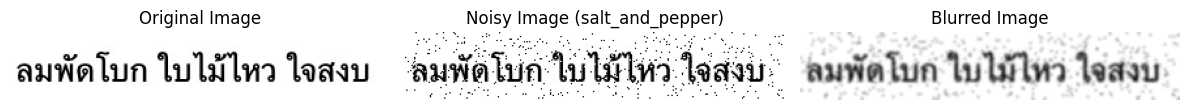

In [3]:

# Plot the images
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(noisy_image)
plt.title(f"Noisy Image ({noise_type})")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(blurred_image)
plt.title("Blurred Image")
plt.axis("off")

plt.tight_layout()
plt.show()




# ให้ลบ Noise และ Blur จากภาพด้วย OpenCV

## **วัตถุประสงค์**
- เขียนโค้ดเพื่อปรับปรุงคุณภาพของภาพที่มี **noise** และถูก **blur** ให้ใกล้เคียงกับภาพต้นฉบับมากที่สุด

---

## **ขั้นตอนการทำงาน**
1. **โหลดภาพ**:
   - โหลดภาพต้นฉบับ (`original_image`), ภาพที่มี noise (`noisy_image`), และภาพที่ถูกเบลอ (`blurred_image`) จากโค้ดที่กำหนด
2. **ลด Noise**:
   - ใช้เทคนิคลด noise ต่าง ๆ 
3. **ลบ Blur**:
   - ใช้เทคนิคการ Sharpening Filters 
4. **วัดผลลัพธ์**:
     - เปรียบเทียบภาพที่ปรับปรุงแล้วกับภาพต้นฉบับ (`original_image`)

---

## **คำถาม**
1. Noise แบบใดที่แก้ไขได้ง่ายที่สุด และแบบใดที่แก้ไขได้ยากที่สุด?
2. เทคนิคการลบ noise หรือ blur แบบใดที่ให้ผลลัพธ์ดีที่สุด?

---

## **ข้อกำหนด**
1. โค้ดต้องมีการพล็อตภาพ 4 ภาพ:
   - **Original Image**
   - **Noisy Image**
   - **Blurred Image**
   - **Denoised and De-blurred Image**
2. แสดงค่า **PSNR** และ **SSIM** ระหว่างภาพต้นฉบับและภาพที่ปรับปรุงแล้ว

---


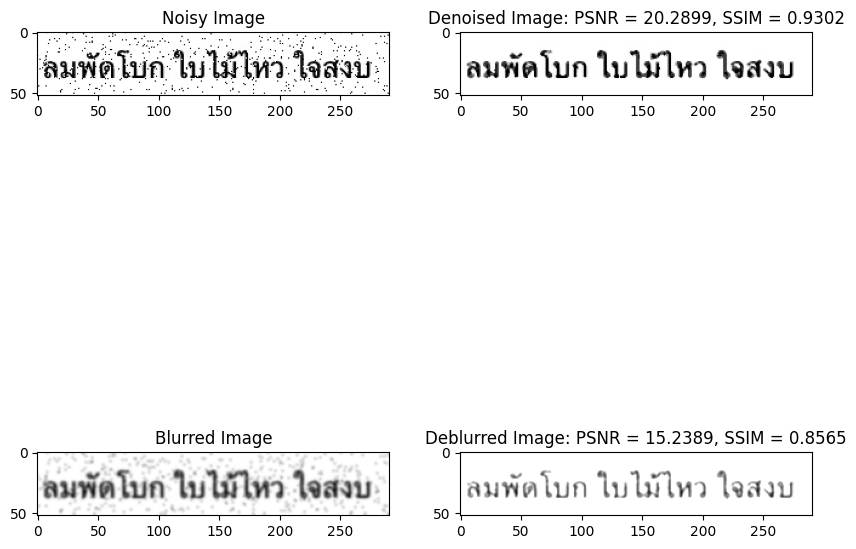

ValueError: win_size exceeds image extent. Either ensure that your images are at least 7x7; or pass win_size explicitly in the function call, with an odd value less than or equal to the smaller side of your images. If your images are multichannel (with color channels), set channel_axis to the axis number corresponding to the channels.

In [13]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage import metrics

# Load the imagesimport cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import metrics


def denoise_and_deblur(noisy_image, blurred_image, kernel_size=3):
    # Denoise noisy image
    denoised_image = cv2.medianBlur(noisy_image, kernel_size)

    # Unsharpen blurred image
    blurred_float = np.float32(blurred_image)
    kernel = np.ones((kernel_size, kernel_size), np.float32) / 25
    blurred_lpf = cv2.filter2D(blurred_float, -1, kernel)
    unsharp_image = cv2.addWeighted(blurred_float, 2.0, blurred_lpf, -1.0, 0)

    return denoised_image, cv2.convertScaleAbs(unsharp_image)


denoised_image, unsharp_image = denoise_and_deblur(noisy_image, blurred_image)

# Calculate PSNR and SSIM between original image and processed image
min_dim = min(min(original_image.shape), min(denoised_image.shape), min(unsharp_image.shape))
window_size = min_dim if min_dim % 2 else min_dim - 1  # Window size must be an odd number

# Compute SSIM with defined window_size
ssim_denoised = metrics.structural_similarity(original_image, denoised_image, win_size=window_size)
ssim_unsharp = metrics.structural_similarity(original_image, unsharp_image, win_size=window_size)

# Compute PSNR
psnr_denoised = cv2.PSNR(original_image, denoised_image)
psnr_unsharp = cv2.PSNR(original_image, unsharp_image)

# Plot
plt.figure(figsize=(10, 10))
plt.subplot(221), plt.imshow(noisy_image), plt.title('Noisy Image')
plt.subplot(222), plt.imshow(denoised_image), plt.title(
    f'Denoised Image: PSNR = {psnr_denoised:.4f}, SSIM = {ssim_denoised:.4f}')
plt.subplot(223), plt.imshow(blurred_image), plt.title('Blurred Image')
plt.subplot(224), plt.imshow(unsharp_image), plt.title(
    f'Deblurred Image: PSNR = {psnr_unsharp:.4f}, SSIM = {ssim_unsharp:.4f}')
plt.show()

# Denoise the noisy image using Median Filter
denoised_image = cv2.medianBlur(noisy_image, 5)

# Deblur the blurred image using Unsharp Masking
gaussian = cv2.GaussianBlur(blurred_image, (5, 5), 0)
unsharp_image = cv2.addWeighted(blurred_image, 2.0, gaussian, -1.0, 0)

# PSNR and SSIM calculations
psnr_denoised = cv2.PSNR(original_image, denoised_image)
ssim_denoised = metrics.structural_similarity(original_image, denoised_image)

psnr_unsharp = cv2.PSNR(original_image, unsharp_image)
ssim_unsharp = metrics.structural_similarity(original_image, unsharp_image)

# Plot all images
titles = ['Original Image', 'Noisy Image', 'Denoised Image', 'Blurred Image', 'Deblurred Image']
images = [original_image, noisy_image, denoised_image, blurred_image, unsharp_image]
metrics = [(0, 0), (0, 0), (psnr_denoised, ssim_denoised), (0, 0), (psnr_unsharp, ssim_unsharp)]

for i in range(5):
    plt.subplot(2, 3, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i] + '\n PSNR: {:.2f} \n SSIM: {:.2f}'.format(metrics[i][0], metrics[i][1]))
    plt.xticks([]), plt.yticks([])
plt.show()


Ans 1:
     Gaussian ลบออกง่ายที่สุด
     motion blur

Ans 2:
    Gaussian